In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data

/Users/matthewbooth/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [42]:
nvda = data.DataReader('NVDA', 'yahoo',start='1/1/2000')

In [43]:
time_elapsed = (nvda.index[-1] - nvda.index[0]).days

In [44]:
nvda[:2]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,3.96875,3.677083,3.937500,3.901042,7522800.0,3.588800
2000-01-04,3.84375,3.604167,3.833333,3.796875,7512000.0,3.492971


In [45]:
price_ratio = (nvda['Adj Close'][-1] / nvda['Adj Close'][1] )
inverse_num_years = 365.0 / time_elapsed 
cagr = price_ratio ** inverse_num_years - 1
print(cagr)

0.25315507369718326


In [46]:
vol = nvda['Adj Close'].pct_change().std()

In [47]:
trading_days = 252 
vol = vol * math.sqrt(trading_days)
vol

0.6099056726379088

In [48]:
print("cagr (mean returns) : ", str(round(cagr, 4)))
print("vol (standard deviation of return): ", str(round(vol,4)))

cagr (mean returns) :  0.2532
vol (standard deviation of return):  0.6099


In [49]:
daily_return_percent = np.random.normal(cagr/trading_days, vol / math.sqrt(trading_days), trading_days)+1

In [50]:
price_series = [nvda['Adj Close'][-1]]

for drp in daily_return_percent: 
    price_series.append(price_series[-1] * drp)

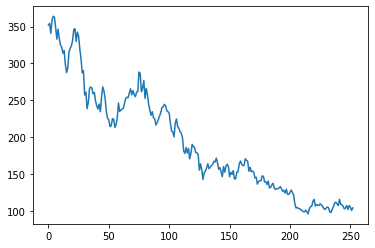

In [51]:
plt.plot(price_series)
plt.show()

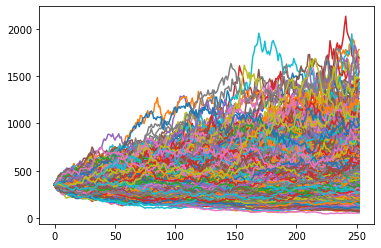

In [52]:
number_of_trials = 1000

for i in range(number_of_trials): 
    daily_return_percent = np.random.normal(cagr/trading_days, vol/math.sqrt(trading_days), trading_days) + 1 
    price_series = [nvda['Adj Close'][-1]]
    
    for drp in daily_return_percent:
        price_series.append(price_series[-1] * drp)
    
    plt.plot(price_series)
plt.show()
                                    